# Projet --- Le meilleur modèle

## Importation des librairies

In [554]:
from math import log

import pandas as pd
from scale import Scale
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from utility import Utility

## 1. Préparation des données

### Importation et extraction des informations des données

In [555]:
# Notre dataframe
root = "../donnees/"
synthetic_df = pd.read_csv(root + "synthetic.csv")
synthetic_df


,Attr_A,Attr_B,Attr_C,Attr_D,Attr_E,Attr_F,Attr_G,Attr_H,Attr_I,Attr_J,Attr_K,Attr_L,Attr_M,Attr_N,Class
0,12.478064,14.784992,1247.541877,100.962061,52.462177,1089.398211,10.575834,8.375407,10.288159,110.746551,994.367610,9.069350,1027.953917,109.672758,1
1,8.264345,8.854181,1389.686814,99.526529,65.106526,1186.523399,9.500485,10.088058,9.371983,78.210274,943.089589,9.988919,1120.317724,83.498764,3
2,9.875571,13.292442,779.077401,123.993772,104.699796,1201.722480,9.545266,14.266238,9.703551,86.252483,1082.989190,10.084217,970.953682,93.557046,2
3,9.207661,9.346913,965.468523,89.176009,102.628284,743.913507,9.777953,11.613946,8.912059,96.727873,812.800511,8.621781,947.207195,120.890054,3
4,8.863842,12.542969,1096.386230,106.595385,131.813380,883.059615,10.092974,13.556029,11.649982,21.566576,971.083175,10.072271,1007.583900,149.511979,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2293,8.537905,9.384823,1327.744849,105.043442,109.078735,1160.837366,10.054976,6.461691,9.718114,146.371553,1057.578998,9.504676,896.830168,50.119576,1
2294,10.727881,12.758686,1017.495424,103.388471,65.953337,955.265960,11.040854,5.930806,9.690326,92.318732,960.311986,9.262439,1158.151512,110.854719,1
2295,9.501612,12.449207,934.067397,94.681564,108.414931,1097.411669,11.379111,12.178924,9.161475,63.980205,972.994510,7.685836,996.569164,89.850887,0
2296,11.581467,12.024253,1247.894013,95.732086,85.265126,1012.536672,9.972115,9.001799,11.909924,128.966934,927.437658,8.906923,891.006210,93.561794,1


### Visualisation des données

In [556]:
# selon deux attributs
#sns.pairplot(synthetic_df.sample(n=100, random_state=1), vars = ["Attr_A", "Attr_B"], hue='Class', size=3)

### Quelques informations sur le dataframe

In [557]:
# la liste des attributs (14 attribut en tout)
#liste_attributs = list(synthetic_df.columns)[:14]
liste_attributs = list(synthetic_df.columns[:-1])
liste_attributs

['Attr_A',
 'Attr_B',
 'Attr_C',
 'Attr_D',
 'Attr_E',
 'Attr_F',
 'Attr_G',
 'Attr_H',
 'Attr_I',
 'Attr_J',
 'Attr_K',
 'Attr_L',
 'Attr_M',
 'Attr_N']

In [558]:
nClass = synthetic_df['Class'].value_counts().count()
nClass

4

In [559]:
nInstanceParClass = synthetic_df['Class'].value_counts()
nInstanceParClass

1    908
0    674
2    472
3    244
Name: Class, dtype: int64

### Pré-traitement des données: Normalisation du dataframe

In [560]:
#norm_synthetic_df, dico_coeffs = Scale.normalize(synthetic_df.loc[:, synthetic.columns != 'Class'])
#norm_synthetic_df, dico_coeffs = Scale.normalize(synthetic_df.iloc[:,:-1])
# --------------------------------------------------------------------------------------------------#

#norm_synthetic_df, dico_coeffs = Scale.normalize(synthetic_df)

In [561]:
#dico_coeffs

In [562]:
#norm_synthetic_df

### Partitionnement des données: données de test, Données d'entrainement, données de validation

In [563]:
## récupération des donnée attributs (liste_attributs)
X = synthetic_df[liste_attributs]
#X

In [564]:
# récupération des étiquettes
y = synthetic_df['Class']
#y

#### Séparation des données en données de test & données d'entrainement

In [565]:
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [566]:
X_tr
#y_train
#X_test
#y_test

,Attr_A,Attr_B,Attr_C,Attr_D,Attr_E,Attr_F,Attr_G,Attr_H,Attr_I,Attr_J,Attr_K,Attr_L,Attr_M,Attr_N
1078,11.820148,11.827123,1119.003160,108.525013,68.612199,1118.180157,9.178398,8.780392,9.527319,118.183824,1056.329780,9.651510,933.094607,108.311258
203,11.054885,11.195031,794.089792,85.289928,135.667721,1032.998570,9.984644,11.864785,8.347867,88.396258,990.356178,9.563961,1060.665946,90.297976
174,12.808474,10.764880,785.159244,109.049201,139.301032,928.792384,9.574443,10.637071,12.330925,94.285823,1079.810771,10.305844,1080.523127,86.065756
1877,10.386823,9.310313,1161.814078,92.814016,93.547017,1404.180139,9.535087,10.961358,10.755184,57.751637,962.554509,8.666568,1125.773847,98.353627
120,7.201730,9.443094,1147.982320,114.165404,119.394555,781.556653,9.032037,9.853075,8.125665,78.388564,999.732191,9.042217,960.897368,95.594191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,10.500580,8.488398,1030.144905,102.816959,135.236907,829.134392,9.879802,12.127433,7.710255,86.368428,1212.644183,9.741186,1195.365675,101.517404
1095,10.075134,9.747951,749.562376,95.946030,87.677656,1180.735377,10.126631,8.601556,8.967080,89.217644,831.615020,10.945471,897.196814,114.706503
1130,10.228703,9.811083,964.832208,94.333244,102.811652,973.889034,10.036836,8.606357,10.520051,93.922696,1159.078265,11.511145,982.915600,84.145803
1294,9.614717,11.321535,943.832125,92.273154,102.943806,1094.288656,9.803798,8.812094,11.254228,68.815528,1266.888276,11.365058,924.465918,99.994353


#### Séparation des données de test en données de validation

In [567]:
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=0.2, random_state=42)

In [568]:
X_val

,Attr_A,Attr_B,Attr_C,Attr_D,Attr_E,Attr_F,Attr_G,Attr_H,Attr_I,Attr_J,Attr_K,Attr_L,Attr_M,Attr_N
574,11.725568,9.735218,1121.993255,109.074579,77.690552,1058.237874,8.222787,8.794168,9.118561,129.395299,1163.942055,10.025660,1014.882673,99.805535
1783,6.684113,12.539529,1068.687053,110.515562,123.925230,1102.294812,9.116742,4.559571,10.289111,108.443886,1139.665317,9.547043,971.887477,84.918136
467,10.496973,12.625772,1196.259479,107.568753,65.088590,1133.069003,9.978720,5.108879,7.329024,123.261006,907.366253,9.946060,904.870120,97.867948
1049,12.926402,6.951106,1248.834533,85.760197,116.830960,937.725781,9.618066,9.848660,12.612403,102.364879,1039.638172,10.720262,1021.503581,80.460558
1591,10.455865,10.772852,1112.327381,106.121619,132.870005,790.768654,11.180318,12.912971,8.782945,67.157561,1120.319736,8.751989,881.638234,90.191465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,5.841731,8.143308,1234.844260,81.129065,119.415205,919.417282,11.041697,10.941478,8.968105,88.346990,987.136408,8.814316,987.945533,81.178464
1360,12.421340,9.589183,1005.000927,86.355594,135.514013,1235.007120,10.898297,9.727192,9.362032,90.057434,955.150957,10.346533,798.173985,108.960197
537,11.768436,8.821537,1042.605538,100.777843,103.927597,1034.859562,11.793465,11.523144,9.935200,99.592988,1110.227653,9.758699,1116.178320,86.188747
443,9.592973,11.685939,925.988915,96.416491,97.532810,815.956665,9.588944,5.657381,8.791206,108.662462,986.986093,10.720163,1043.052961,87.223160


In [569]:
y_test

1085    3
2296    1
208     2
1178    0
282     0
       ..
1133    0
1574    1
923     1
881     0
1196    1
Name: Class, Length: 345, dtype: int64

#### Partitionnement des données:  Fusion des dataframes

In [570]:
data_train = pd.concat([X_train, y_train], axis=1)
data_test = pd.concat([X_test, y_test], axis=1)
data_val = pd.concat([X_val, y_val], axis=1)
data_train

,Attr_A,Attr_B,Attr_C,Attr_D,Attr_E,Attr_F,Attr_G,Attr_H,Attr_I,Attr_J,Attr_K,Attr_L,Attr_M,Attr_N,Class
518,14.158577,7.415962,1387.462676,90.403927,126.598809,881.934674,10.301812,7.791546,9.772399,113.056899,1086.012039,11.634274,859.975477,102.371800,0
1199,8.317394,7.045176,818.479762,99.397015,156.741684,788.857888,10.272027,11.725487,9.272061,82.393537,1003.615253,10.289222,908.080223,99.476914,0
2146,10.548175,5.539823,1059.449335,110.688893,130.153246,753.787846,9.193078,11.785528,11.720813,93.599107,1028.976714,9.953991,1103.875629,83.571708,0
1373,8.625514,12.513245,1126.827650,106.915159,98.627216,1110.795666,10.117957,6.831851,9.572371,109.283181,965.135491,11.065418,895.282858,73.594822,1
2047,10.021791,11.452570,1477.305714,89.894000,85.035426,1237.955005,9.846550,7.392874,10.818787,156.524589,1110.957824,11.150703,948.360252,69.254426,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1358,10.356458,9.860567,938.454414,92.715033,83.178389,1235.259207,10.195205,8.766441,9.192268,91.515957,907.015229,10.769854,1066.839337,72.515614,1
1762,12.081299,10.687750,836.995071,104.799328,86.204644,1015.898210,10.138695,9.972882,8.389676,100.307924,1039.841082,10.653251,960.738727,99.895966,1
1442,9.569284,11.687409,1234.853063,105.171064,96.687615,1195.413624,10.767225,6.520404,9.304105,126.756806,1009.530903,10.486988,1033.628083,73.045895,1
2253,7.784067,11.628025,785.701628,87.043717,124.500735,1226.488115,10.287810,8.524347,11.647850,61.478623,1187.804204,9.417034,877.871299,92.263959,1


## 2. Mise en oeuvre des modèles

### 2.1 Arbre de décision

### Entropie du dataframe

In [571]:
def entropie(dataframe):
    """
    fonction permettant de calculer l'entropie d'un dataframe
    :param dataframe:
    :return: entopie du data frame
    """
    # Nombre d’ instances dans le dataframe :
    nb_lignes = dataframe.shape [0]

    # Decompte du nombre d ’ instance de chaque classe dans le dataframe
    series = dataframe ['Class'].value_counts ()

    #features = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
    features = series.index

    list_occ = []
    for i in range (0, series.count()):
        ft = features[i]
        list_occ.append(series.get(ft))

    sum = 0
    for k in range (0, len(list_occ)):
        nk = list_occ[k]
        p_v =  nk / nb_lignes
        sum += p_v * log(p_v,2)
    return -sum


#### Test de l'entropie

In [572]:
print(entropie(data_train))

1.868969001216211


### Calcul du gain d'information

In [573]:
# A refaire avec la méthode des quartiles
def gain_information(dataframe, attribut):
    """
    Fonction qui calcul le gain d'un attribut passé en paramètre
    :param dataframe:
    :param attribut:
    :return: un tuple représentant : (gain, split_value, partitions)
    """
    #print(attribut)
    entropie_df     = entropie(dataframe)
    gain            = 0.0
    split_value     = 0.0
    partitions      = [None] * 2
    tmp_partitions  = [None] * 2
    tmp_gain        = 0.0
    tmp_split_value = 0.0

    sorted_data     = dataframe.sort_values (by = attribut)
    q_n             = sorted_data[attribut].quantile([.25, .5, .75]).values #calcul le quantil et retourne les valeurs
    nb_instance_df  = dataframe.shape[0]

    for i in range(len(q_n)):

        tmp_split_value   = q_n[i]
        tmp_partitions[0] = sorted_data[sorted_data[attribut] < tmp_split_value]
        tmp_partitions[1] = sorted_data[sorted_data[attribut] >= tmp_split_value]

        tmp_gain = 0.0
        for k in range(len(tmp_partitions)):
            nb_instance_p    = tmp_partitions[k].shape[0]
            tmp_gain        += (nb_instance_p/nb_instance_df) * entropie(tmp_partitions[k])
        #print(tmp_gain)

        tmp_gain = entropie_df - tmp_gain
        if(gain < tmp_gain):
            gain        = tmp_gain
            split_value = tmp_split_value
            partitions  = tmp_partitions.copy()

    return gain,split_value,partitions



#### Test du gain d'information.

In [574]:
#print("\n\033[1m GAIN OF Attr_A: \033[0m")
gain_information(data_train, 'Attr_A')

(0.11981589644987589,
 10.3721504438006,
 [         Attr_A     Attr_B       Attr_C      Attr_D      Attr_E       Attr_F  \
  167    3.849151   6.987703  1360.650309  108.065439  112.724986  1121.037824   
  711    4.544928   9.514147  1336.940797   97.876955  107.533019  1060.738667   
  245    4.781749  14.022814  1185.219922  120.079881  134.873534  1019.790528   
  709    4.918297   6.776774  1168.244168  101.741809   98.456682  1094.426567   
  633    5.012356  11.196494   941.111312   89.942694   75.735434   935.498776   
  ...         ...        ...          ...         ...         ...          ...   
  1358  10.356458   9.860567   938.454414   92.715033   83.178389  1235.259207   
  1445  10.361576   9.035097  1225.651165  100.385732  104.564129   666.197209   
  648   10.363813  10.724329   755.395766   89.525919  102.575423  1076.158222   
  2227  10.370400   9.094566  1042.199401  105.581240   95.979645   787.363321   
  1589  10.371320   8.575152  1290.795525   87.750260  12

In [575]:
#print("\n\033[1m GAIN OF Attr_B: \033[0m")
#gain_information(synthetic_df, 'Attr_B')

In [576]:
#print("\n\033[1m GAIN OF Attr_C: \033[0m")
#gain_information(synthetic_df, 'Attr_C')

In [577]:
#print("\n\033[1m GAIN OF Attr_D: \033[0m")
#gain_information(synthetic_df, 'Attr_D'))

### Déterminer le meilleur attribut à partir du gain

In [578]:
def meilleur_attribut(dataframe, liste_attributs):
    """
    fonction qui détermine le meilleur attribut parmis un ensemble(liste_d'attributs)
    :param dataframe:
    :param liste_attributs:
    :return: l'ensemble des information du mmeilleur attribut sous forme de tuple
            (meilleur_attribut, gain, split_value, partitions)
    """

    # Variables de suivi du meilleur critère.
    best_gain = 0.0
    best_split = 0.0
    best_partition = [None,None]
    best_attribut = None
    for i in range (0, len(liste_attributs)):
        gain, split_value, partitions = gain_information(dataframe, liste_attributs[i])
        if gain > best_gain and len(partitions[0]) > 0 and len(partitions[1]) > 0:
            best_gain = gain
            best_split = split_value
            best_partition = partitions
            best_attribut = liste_attributs[i]

    print("meilleur attribut:", best_attribut, best_gain, best_split)
    return best_attribut, best_gain, best_split, best_partition

#### Test du meilleur attribut parmis une liste d'attributs

In [579]:
print("\n\033[1m BEST FEATURES: \033[0m")
meilleur_attribut(data_train, liste_attributs)


 BEST FEATURES: 
meilleur attribut: Attr_B 0.16860628410333023 10.232649934230249


('Attr_B',
 0.16860628410333023,
 10.232649934230249,
 [         Attr_A     Attr_B       Attr_C      Attr_D      Attr_E       Attr_F  \
  1379   6.432373   4.179097  1097.997564  103.898655  102.736818  1227.495298   
  517    9.623709   4.890602  1183.400895   84.259670   32.280760  1404.745473   
  234   12.043613   5.101339  1111.428994   92.087728  156.996248   383.834504   
  256   13.837958   5.153041   742.171244  120.328706  120.157407  1438.510057   
  1874   9.122621   5.254692  1064.903608   91.098039   70.727670  1288.239146   
  ...         ...        ...          ...         ...         ...          ...   
  1941  12.468481  10.217835   869.221610  114.023627  118.120969  1193.085006   
  494   11.959082  10.221312  1233.297553   99.549565   71.914625  1151.625254   
  1372   6.793843  10.223255   931.776658   82.144977   98.565785  1198.693658   
  2166   8.494749  10.231153  1095.903539  103.527496   77.919391   996.913556   
  944    7.378612  10.231545   864.338533   

### Construction de l'arbre de décision

In [580]:
class Noeud:
    """
    Class noeud réprésentant notre arbre de décision
    :param split, attibut, branche_gauche, branche_droit, prédiction, feuille
    """
    def __init__(self, split = None, attribut = None, branche_gauche = None, branche_droit = None, prediction = None, feuille = False):
        self.valeur_split = split
        self.attribut = attribut
        self.branche_droit = branche_droit
        self.branche_gauche = branche_gauche
        self.prediction = prediction
        self.feuille = feuille

    def estFeuille(self):
        return self.feuille == True

    def resultat_noeud(self, spacing =''):
        s = ''
        for v in range(len(self.prediction.values)):
            s += ' Class ' + str(self.prediction.index[v]) + ' Count: ' + str(self.prediction.values[v]) + '\n' + spacing
        return s

In [581]:
def construction_arbre(dataframe, cible, seuil, attributs_restants, profondeur):
    """
    Fonction qui construit l'arbre de décision

    :param dataframe:
            Notre dataframe initial
    :param cible:
            la classe que l'on veut prédire. elle correspond à l'attribut nommé "class" de notre dataframe
    :param attributs_restants:
            liste des attributs qui va diminuer ie dès qu'on aura déterminer le meilleur attribut,
            on l'enlèvera de notre liste et on reprendra le même processus pour les autres attributs restant et ainsi de
            suite ...
    :param profondeur:
        profondeur de notre arbre (au départ 0, qui va croitre jusqu'à un seuil fixé par moi :)
    :return:
        un noeud qui représente la  racine de l'arbre
    """
    print(attributs_restants)
    attribut, gain, split, partitions = meilleur_attribut(dataframe, attributs_restants)
    prediction = dataframe[cible].value_counts()        # récupère le nombre d'instance de la class
    print("------- prediction ----------:\n", prediction)
    print("-----------------------------:\n")

    if profondeur > seuil or len(attributs_restants) == 0 or gain <= 0.0:
        # si on atteint la profondeur souhaité ou qu'il ne reste plus aucun attribut
        # on considère le neud comme feuille et on y met nos prédictions et on s'arrète :)
        return Noeud(prediction = prediction, feuille = True)

    # ici on considère qu'on déjà explorer <attribut> (le meilleur) et donc on le supprime de la liste
    #if(attribut in attributs_restants):
    attributs_restants.remove(attribut)
    # puis on reprend le même processus pour les attributs qui reste
    branche_gauche = construction_arbre(partitions[0], cible, seuil, attributs_restants.copy(), profondeur + 1)
    branche_droit = construction_arbre(partitions[1], cible, seuil, attributs_restants.copy(), profondeur + 1)

    # Puis on retourne l'aubre ie la racine
    return Noeud(split, attribut, branche_gauche, branche_droit, prediction)

In [582]:
def print_tree (node , spacing = '') :
    if node is None:
        return
    if node.estFeuille() :
        print (spacing + node.resultat_noeud(spacing))
        return
    print ('{}[ Attribute : {} Split value : {}]'.format (spacing , node.attribut , node.valeur_split))

    print (spacing + '> True')
    print_tree (node.branche_gauche , spacing + '-')

    print (spacing + '> False')
    print_tree(node.branche_droit, spacing + '-')

### Mise en place des arbres de profondeur différentes

In [583]:
dt1 = construction_arbre(dataframe=data_train, cible='Class', seuil=1, attributs_restants=liste_attributs, profondeur=0)
dt2 = construction_arbre(dataframe=data_train, cible='Class', seuil=2, attributs_restants=liste_attributs, profondeur=0)

['Attr_A', 'Attr_B', 'Attr_C', 'Attr_D', 'Attr_E', 'Attr_F', 'Attr_G', 'Attr_H', 'Attr_I', 'Attr_J', 'Attr_K', 'Attr_L', 'Attr_M', 'Attr_N']
meilleur attribut: Attr_B 0.16860628410333023 10.232649934230249
------- prediction ----------:
 1    620
0    442
2    326
3    174
Name: Class, dtype: int64
-----------------------------:

['Attr_A', 'Attr_C', 'Attr_D', 'Attr_E', 'Attr_F', 'Attr_G', 'Attr_H', 'Attr_I', 'Attr_J', 'Attr_K', 'Attr_L', 'Attr_M', 'Attr_N']
meilleur attribut: Attr_I 0.17795704260214218 9.67542398752274
------- prediction ----------:
 0    350
1    189
3    138
2    104
Name: Class, dtype: int64
-----------------------------:

['Attr_A', 'Attr_C', 'Attr_D', 'Attr_E', 'Attr_F', 'Attr_G', 'Attr_H', 'Attr_J', 'Attr_K', 'Attr_L', 'Attr_M', 'Attr_N']
meilleur attribut: Attr_F 0.2085090880386704 1015.1905029534001
------- prediction ----------:
 0    211
2     84
3     75
1     20
Name: Class, dtype: int64
-----------------------------:

['Attr_A', 'Attr_C', 'Attr_D', 'Attr_

In [584]:
dt3 = construction_arbre(dataframe=data_train, cible='Class', seuil=3, attributs_restants=liste_attributs, profondeur=0)
#print_tree(dt4, '')

['Attr_A', 'Attr_C', 'Attr_D', 'Attr_E', 'Attr_F', 'Attr_G', 'Attr_H', 'Attr_I', 'Attr_K', 'Attr_L', 'Attr_M', 'Attr_N']
meilleur attribut: Attr_N 0.13130765426127522 108.74071437352308
------- prediction ----------:
 1    620
0    442
2    326
3    174
Name: Class, dtype: int64
-----------------------------:

['Attr_A', 'Attr_C', 'Attr_D', 'Attr_E', 'Attr_F', 'Attr_G', 'Attr_H', 'Attr_I', 'Attr_K', 'Attr_L', 'Attr_M']
meilleur attribut: Attr_F 0.16004411829459175 1056.0349502123445
------- prediction ----------:
 1    532
0    400
2    147
3     92
Name: Class, dtype: int64
-----------------------------:

['Attr_A', 'Attr_C', 'Attr_D', 'Attr_E', 'Attr_G', 'Attr_H', 'Attr_I', 'Attr_K', 'Attr_L', 'Attr_M']
meilleur attribut: Attr_H 0.22489746170927072 8.997662989823656
------- prediction ----------:
 0    318
1    151
2     82
3     34
Name: Class, dtype: int64
-----------------------------:

['Attr_A', 'Attr_C', 'Attr_D', 'Attr_E', 'Attr_G', 'Attr_I', 'Attr_K', 'Attr_L', 'Attr_M']
meil

In [585]:
dt4 = construction_arbre(dataframe=data_train, cible='Class', seuil= 4, attributs_restants=liste_attributs, profondeur=0)
#print_tree(dt4, '')

['Attr_A', 'Attr_C', 'Attr_D', 'Attr_E', 'Attr_F', 'Attr_G', 'Attr_H', 'Attr_I', 'Attr_K', 'Attr_L', 'Attr_M']
meilleur attribut: Attr_H 0.12529771200344308 10.185660574687407
------- prediction ----------:
 1    620
0    442
2    326
3    174
Name: Class, dtype: int64
-----------------------------:

['Attr_A', 'Attr_C', 'Attr_D', 'Attr_E', 'Attr_F', 'Attr_G', 'Attr_I', 'Attr_K', 'Attr_L', 'Attr_M']
meilleur attribut: Attr_E 0.1465564223056104 114.05634931879582
------- prediction ----------:
 1    466
0    151
2    101
3     63
Name: Class, dtype: int64
-----------------------------:

['Attr_A', 'Attr_C', 'Attr_D', 'Attr_F', 'Attr_G', 'Attr_I', 'Attr_K', 'Attr_L', 'Attr_M']
meilleur attribut: Attr_I 0.09926640541095466 10.330093546109682
------- prediction ----------:
 1    414
0     72
3     55
2     44
Name: Class, dtype: int64
-----------------------------:

['Attr_A', 'Attr_C', 'Attr_D', 'Attr_F', 'Attr_G', 'Attr_K', 'Attr_L', 'Attr_M']
meilleur attribut: Attr_A 0.1039953932940649

##### DT5

In [586]:
dt5 = construction_arbre(dataframe=data_train, cible='Class', seuil=5, attributs_restants=liste_attributs, profondeur=0)
#print_tree(dt5, '')

['Attr_A', 'Attr_C', 'Attr_D', 'Attr_E', 'Attr_F', 'Attr_G', 'Attr_I', 'Attr_K', 'Attr_L', 'Attr_M']
meilleur attribut: Attr_I 0.12450724018383341 9.983499706139298
------- prediction ----------:
 1    620
0    442
2    326
3    174
Name: Class, dtype: int64
-----------------------------:

['Attr_A', 'Attr_C', 'Attr_D', 'Attr_E', 'Attr_F', 'Attr_G', 'Attr_K', 'Attr_L', 'Attr_M']
meilleur attribut: Attr_E 0.2166205379694286 84.82596222934842
------- prediction ----------:
 0    301
2    204
1    155
3    121
Name: Class, dtype: int64
-----------------------------:

['Attr_A', 'Attr_C', 'Attr_D', 'Attr_F', 'Attr_G', 'Attr_K', 'Attr_L', 'Attr_M']
meilleur attribut: Attr_A 0.10403147497149301 10.280645654085102
------- prediction ----------:
 1    106
3     45
0     35
2      9
Name: Class, dtype: int64
-----------------------------:

['Attr_C', 'Attr_D', 'Attr_F', 'Attr_G', 'Attr_K', 'Attr_L', 'Attr_M']
meilleur attribut: Attr_C 0.2599122630438342 1000.9270862012676
------- prediction ---

##### DT6

In [587]:
dt6 = construction_arbre(dataframe=data_train, cible='Class', seuil=6, attributs_restants=liste_attributs, profondeur=0)
dt7 = construction_arbre(dataframe=data_train, cible='Class', seuil=7, attributs_restants=liste_attributs, profondeur=0)
dt8 = construction_arbre(dataframe=data_train, cible='Class', seuil=8, attributs_restants=liste_attributs, profondeur=0)
#print_tree(dt6, '')

['Attr_A', 'Attr_C', 'Attr_D', 'Attr_E', 'Attr_F', 'Attr_G', 'Attr_K', 'Attr_L', 'Attr_M']
meilleur attribut: Attr_A 0.11981589644987589 10.3721504438006
------- prediction ----------:
 1    620
0    442
2    326
3    174
Name: Class, dtype: int64
-----------------------------:

['Attr_C', 'Attr_D', 'Attr_E', 'Attr_F', 'Attr_G', 'Attr_K', 'Attr_L', 'Attr_M']
meilleur attribut: Attr_F 0.10396767331530432 936.1333752265484
------- prediction ----------:
 2    265
1    221
0    166
3    129
Name: Class, dtype: int64
-----------------------------:

['Attr_C', 'Attr_D', 'Attr_E', 'Attr_G', 'Attr_K', 'Attr_L', 'Attr_M']
meilleur attribut: Attr_E 0.07303512254004985 124.67336531073255
------- prediction ----------:
 0    96
2    51
1    29
3    19
Name: Class, dtype: int64
-----------------------------:

['Attr_C', 'Attr_D', 'Attr_G', 'Attr_K', 'Attr_L', 'Attr_M']
meilleur attribut: Attr_C 0.045107394053947925 985.4519826341658
------- prediction ----------:
 0    62
2    48
1    20
3    16
N

In [588]:
def print_prediction_inference(instance, noeud, attribut_noeud):
    """
    fonction permettant d'inférer une class à une instance
    :param instance:
        une instance de notre dataframe
    :param noeud:
        racine de l'arbre
    :param attribut_noeud:
        l'attribut de la racine (celle avec le plus fort pouvoir discriminatoire
        ie avec le gain le plus élévé.
    :return:
        rien (affichage d'information)
    """
    print(attribut_noeud)
    if noeud.estFeuille():
        print(noeud.prediction)

    else:
        # pour l'instance, on récupère la valeur de l'attribut correspondant à celle du noeud
        valeur_attribut = instance[attribut_noeud].iloc[0]
        if valeur_attribut < noeud.valeur_split:
            print_prediction_inference(instance, noeud.branche_gauche, noeud.branche_gauche.attribut)
        else:
            print_prediction_inference(instance, noeud.branche_droit, noeud.branche_droit.attribut)

In [589]:
def inference(instance, noeud, attribut_noeud):
    """
    fonction permettant d'inférer une class à une instance
    :param instance:
        une instance de notre dataframe
    :param noeud:
        racine de l'arbre
    :param attribut_noeud:
        l'attribut de la racine (celle avec le plus fort pouvoir discriminatoire
        ie avec le gain le plus élévé.
    :return:
        prédictions
    """
    #print(attribut_noeud)
    if noeud.estFeuille():
        return noeud.prediction

    else:
        # pour l'instance, on récupère la valeur de l'attribut correspondant à celle du noeud
        valeur_attribut = instance[attribut_noeud].iloc[0]
        if valeur_attribut < noeud.valeur_split:
            return inference(instance, noeud.branche_gauche, noeud.branche_gauche.attribut)
        else:
            return inference(instance, noeud.branche_droit, noeud.branche_droit.attribut)

### Tester l'inférence d'une instance

#### Prélèvement aléatoire d'un instance

In [590]:
instance = data_train.sample()
instance
#copie = data_train.iloc[1:2]
#copie

,Attr_A,Attr_B,Attr_C,Attr_D,Attr_E,Attr_F,Attr_G,Attr_H,Attr_I,Attr_J,Attr_K,Attr_L,Attr_M,Attr_N,Class
896,10.89767,9.945237,915.407349,101.164788,117.984042,1208.488893,10.953711,11.223643,13.271235,84.289711,980.98102,10.385689,802.788825,97.624017,1


In [591]:
#print_prediction_inference(copie, dt3, dt3.attribut)
y_pred = inference(instance, dt3, dt3.attribut)
y_pred

1    57
2    10
0     7
Name: Class, dtype: int64

In [592]:
def get_class_from_prediction(pred):
    """
    Retourne une class à partir des prédictions
    :param pred:
    :return:
    """
    return pred.idxmax()

In [593]:
get_class_from_prediction(y_pred)

1

#### 1ère méthode : stocker les prediction dans une liste, puis convertir cette liste en dataframe, puis en fichier csv

In [594]:
def get_prediction_list(arbre, data_test):
    """
    fonction qui calcul et stock les predictions d'une instance dans une liste
    :param arbre:
    :param data_test:
    :return:
        une liste
    """
    lst = []
    for i in range(1,len(data_test)+1):
        classe_predite = get_class_from_prediction(inference(data_test.iloc[i-1:i], arbre, arbre.attribut))
        lst.append(classe_predite)
    return lst

In [595]:
def set_prediction_csv(file_name, arbre, data_test):
    root = "predictions/all_preds/"
    liste_predictions = get_prediction_list(arbre, data_test)
    # on récupère la liste, puis on le stock dans un csv
    res = pd.DataFrame (liste_predictions, columns = ['Class'])
    # très important de faire correspondre les index avec ceux de X_test
    res.index = X_test.index
    res.to_csv(root + file_name, index=None, header=None)

In [596]:
#set_prediction_csv("y_pred_DT5.csv", dt5, data_test)

#### 2ème méthode : Stocker directement les predictions au fur et à mesure dans un fichier csv

In [597]:

def write_prediction(arbre, data_test, profondeur, tp):
    """
    fonction qui calcul et stock les predictions d'une instance dans un fichier .csv
    :param arbre:
    :param data_test:
    :param profondeur:
    :return:
        rien
    """
    root = "predictions/all_preds/"
    name = ""
    if(tp == "train"):
        name += "y_pred_train_DT"
    elif tp == "val":
        name += "y_pred_val_DT"
    else :
        name += "y_pred_DT"
    # ouvre un fichier
    fichier = open(root + name + str(profondeur)+ ".csv", "a")
    for i in range(1,len(data_test)+1):
        pred = get_class_from_prediction(inference(data_test.iloc[i-1:i], arbre, arbre.attribut))
        fichier.write(str(pred) + "\n")
    # ferme le fichier
    fichier.close()

In [598]:
write_prediction(dt1, data_test, 1, "test")
write_prediction(dt2, data_test, 2, "test")
write_prediction(dt3, data_test, 3, "test")
write_prediction(dt4, data_test, 4, "test")
write_prediction(dt5, data_test, 5, "test")
write_prediction(dt6, data_test, 6, "test")
write_prediction(dt7, data_test, 7, "test")
write_prediction(dt8, data_test, 8, "test")

write_prediction(dt1, data_train, 1, "train")
write_prediction(dt2, data_train, 2, "train")
write_prediction(dt3, data_train, 3, "train")
write_prediction(dt4, data_train, 4, "train")
write_prediction(dt5, data_train, 5, "train")
write_prediction(dt6, data_train, 6, "train")
write_prediction(dt7, data_train, 7, "train")
write_prediction(dt8, data_train, 8, "train")


write_prediction(dt1, data_val, 1, "val")
write_prediction(dt2, data_val, 2, "val")
write_prediction(dt3, data_val, 3, "val")
write_prediction(dt4, data_val, 4, "val")
write_prediction(dt5, data_val, 5, "val")
write_prediction(dt6, data_val, 6, "val")
write_prediction(dt7, data_val, 7, "val")
write_prediction(dt8, data_val, 8, "val")

In [599]:
"""
# Stocker le y_test dans un fichier csv
root = "predictions/all_preds/"
res = pd.DataFrame(y_train)
#res.index = X_test.index # its important for comparison
res.columns = ["Class"]
res.to_csv(root + "y_train.csv", index=None, header=None)

"""


'\n# Stocker le y_test dans un fichier csv\nroot = "predictions/all_preds/"\nres = pd.DataFrame(y_train)\n#res.index = X_test.index # its important for comparison\nres.columns = ["Class"]\nres.to_csv(root + "y_train.csv", index=None, header=None)\n\n'

In [600]:
def error_rate(liste_actuals, liste_predicted):
    count_err = 0
    for i in range (len(liste_actuals)):
        if(liste_actuals[i] != liste_predicted[i]):
            count_err += 1
    return count_err / float(len(liste_actuals)) * 100.0

def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0

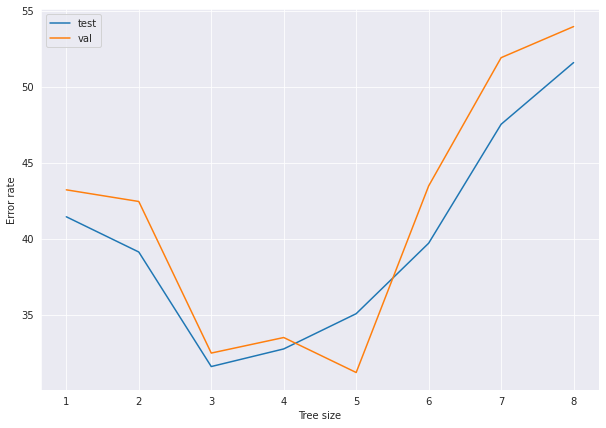

In [601]:
pred_DT1 = pd.read_csv("./predictions/all_preds/y_pred_DT1.csv", header=None)
pred_DT2 = pd.read_csv("./predictions/all_preds/y_pred_DT2.csv", header=None)
pred_DT3 = pd.read_csv("./predictions/all_preds/y_pred_DT3.csv", header=None)
pred_DT4 = pd.read_csv("./predictions/all_preds/y_pred_DT4.csv", header=None)
pred_DT5 = pd.read_csv("./predictions/all_preds/y_pred_DT5.csv", header=None)
pred_DT6 = pd.read_csv("./predictions/all_preds/y_pred_DT6.csv", header=None)
pred_DT7 = pd.read_csv("./predictions/all_preds/y_pred_DT7.csv", header=None)
pred_DT8 = pd.read_csv("./predictions/all_preds/y_pred_DT8.csv", header=None)

pred_val_DT1 = pd.read_csv("./predictions/all_preds/y_pred_val_DT1.csv", header=None)
pred_val_DT2 = pd.read_csv("./predictions/all_preds/y_pred_val_DT2.csv", header=None)
pred_val_DT3 = pd.read_csv("./predictions/all_preds/y_pred_val_DT3.csv", header=None)
pred_val_DT4 = pd.read_csv("./predictions/all_preds/y_pred_val_DT4.csv", header=None)
pred_val_DT5 = pd.read_csv("./predictions/all_preds/y_pred_val_DT5.csv", header=None)
pred_val_DT6 = pd.read_csv("./predictions/all_preds/y_pred_val_DT6.csv", header=None)
pred_val_DT7 = pd.read_csv("./predictions/all_preds/y_pred_val_DT7.csv", header=None)
pred_val_DT8 = pd.read_csv("./predictions/all_preds/y_pred_val_DT8.csv", header=None)

pred_train_DT1 = pd.read_csv("./predictions/all_preds/y_pred_train_DT1.csv", header=None)
pred_train_DT2 = pd.read_csv("./predictions/all_preds/y_pred_train_DT2.csv", header=None)
pred_train_DT3 = pd.read_csv("./predictions/all_preds/y_pred_train_DT3.csv", header=None)
pred_train_DT4 = pd.read_csv("./predictions/all_preds/y_pred_train_DT4.csv", header=None)
pred_train_DT5 = pd.read_csv("./predictions/all_preds/y_pred_train_DT5.csv", header=None)
pred_train_DT6 = pd.read_csv("./predictions/all_preds/y_pred_train_DT6.csv", header=None)
pred_train_DT7 = pd.read_csv("./predictions/all_preds/y_pred_train_DT7.csv", header=None)
pred_train_DT8 = pd.read_csv("./predictions/all_preds/y_pred_train_DT8.csv", header=None)

y_test = pd.read_csv("./predictions/all_preds/y_test.csv", header=None)
y_train = pd.read_csv("./predictions/all_preds/y_train.csv", header=None)
y_val = pd.read_csv("./predictions/all_preds/y_val.csv", header=None)

p1 = list(pred_DT1[0])
p2 = list(pred_DT2[0])
p3 = list(pred_DT3[0])
p4 = list(pred_DT4[0])
p5 = list(pred_DT5[0])
p6 = list(pred_DT6[0])
p7 = list(pred_DT7[0])
p8 = list(pred_DT8[0])

pt1 = list(pred_train_DT1[0])
pt2 = list(pred_train_DT2[0])
pt3 = list(pred_train_DT3[0])
pt4 = list(pred_train_DT4[0])
pt5 = list(pred_train_DT5[0])
pt6 = list(pred_train_DT6[0])
pt7 = list(pred_train_DT7[0])
pt8 = list(pred_train_DT8[0])

pv1 = list(pred_val_DT1[0])
pv2 = list(pred_val_DT2[0])
pv3 = list(pred_val_DT3[0])
pv4 = list(pred_val_DT4[0])
pv5 = list(pred_val_DT5[0])
pv6 = list(pred_val_DT6[0])
pv7 = list(pred_val_DT7[0])
pv8 = list(pred_val_DT8[0])

a = list(y_test[0])
at = list(y_train[0])
av = list(y_val[0])

lst = []
lst_t = []
lst_v = []


lst.append(p1)
lst.append(p2)
lst.append(p3)
lst.append(p4)
lst.append(p5)
lst.append(p6)
lst.append(p7)
lst.append(p8)

lst_t.append(pt1)
lst_t.append(pt2)
lst_t.append(pt3)
lst_t.append(pt4)
lst_t.append(pt5)
lst_t.append(pt6)
lst_t.append(pt7)
lst_t.append(pt8)

lst_v.append(pv1)
lst_v.append(pv2)
lst_v.append(pv3)
lst_v.append(pv4)
lst_v.append(pv5)
lst_v.append(pv6)
lst_v.append(pv7)
lst_v.append(pv8)

err = []
err_t = []
err_v = []

for e in lst:
    err.append(error_rate(a, e))
for e in lst_t:
    err_t.append(error_rate(at, e))
for v in lst_v:
    err_v.append(error_rate(av, v))


plt.figure(figsize=(10,7))
plt.plot([1, 2, 3, 4, 5, 6, 7, 8], err, label='test')
plt.plot([1, 2, 3, 4, 5, 6, 7, 8], err_v, label='val')
plt.xlabel("Tree size")
plt.ylabel("Error rate")
plt.legend()